# Exploratory Data Analysis-World's Oilfields

The following notebook is an attempt to derive additional insights from the world oilfield discovery data using awesome exploratory data analysis libraries in python.


![alt text](Rig.gif "Oil Rig")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import folium
import folium.plugins

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("GiantOilandGasFields.csv")

Let's analyze the dataset. The important information that we have in this dataset is Field name, Country of location, an average location (Latitude & Longitude), Type of the hydrocarbon trap, Reservoir lithology, Era, Reservoir depth (in KMs), discovery year etc.

In [4]:
data = data[['FLD_NAME','FIELD_ID', 'COUNTRY','LAT_DD','LON_DD','TRAP_CLASS','TRAP_TYPE', 'RSVR_LITH1' , 'ERA', 'RSVR_DEPKM', 'ON_OFF_LOC', 'DISC_YR', 'FIELD_TYPE','SIZE_CLASS', 'EUR_MMBOE', 'RSVS_MMBOE' ]]
data.columns

Index(['FLD_NAME', 'FIELD_ID', 'COUNTRY', 'LAT_DD', 'LON_DD', 'TRAP_CLASS',
       'TRAP_TYPE', 'RSVR_LITH1', 'ERA', 'RSVR_DEPKM', 'ON_OFF_LOC', 'DISC_YR',
       'FIELD_TYPE', 'SIZE_CLASS', 'EUR_MMBOE', 'RSVS_MMBOE'],
      dtype='object')

Based on the size of these fields, we try to visualize the proportion of Giant, Megagiant and Supergiant fields throughout the world.

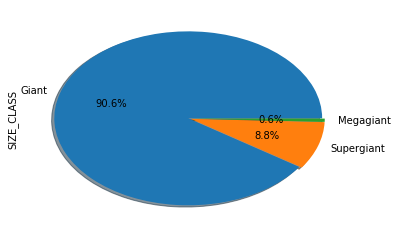

In [5]:
data['SIZE_CLASS'].value_counts().plot.pie(explode = [0.01,0.01,0.01],autopct='%1.1f%%',shadow=True)

The country wise distribution of hydrocarbon fields is an indicator of its contribution to world's total oil production. Russia has the largest number of oil fields followed by USA, Iran and Saudi Arabia.

In [6]:
#Let's check which country has the largest number of fields
data_country = pd.DataFrame(data.groupby(['COUNTRY','FIELD_TYPE'])['FLD_NAME'].count().sort_values(ascending = False)).reset_index()
data_country.columns = ['COUNTRY','FIELD_TYPE', 'TotalFields']
data_country.groupby('COUNTRY')['TotalFields'].sum().sort_values(ascending=False)[:15]

COUNTRY
Russia            157
United States     109
Iran               70
Saudi Arabia       59
China              37
Iraq               34
Australia          32
Brazil             32
Venezuela          31
Nigeria            31
Norway             26
Libya              26
Canada             25
UAE                23
United Kingdom     21
Name: TotalFields, dtype: int64

The proprtion of oil and gas fields out of total hydrocarbon fields can give us an idea of the type of hydrocarbon reserves surplus in individual countries.

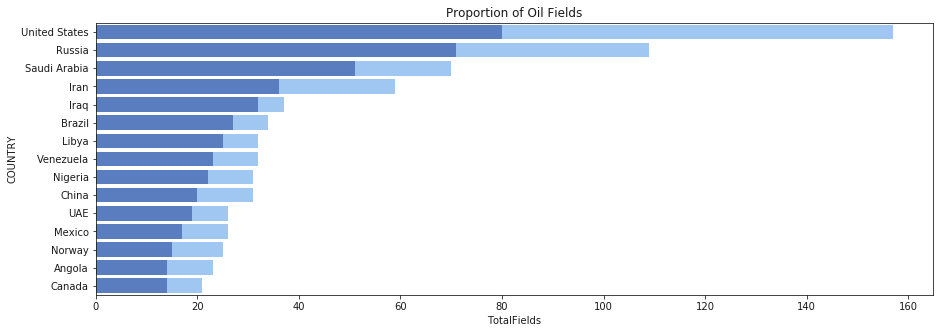

In [7]:
plt.figure(figsize = (15,5))
sns.set_color_codes("pastel")
data_c= pd.DataFrame(data_country.groupby('COUNTRY')['TotalFields'].sum().sort_values(ascending=False)).reset_index()
data_c
ax= sns.barplot('TotalFields','COUNTRY', data = data_c[:15], color ="b")
ax.set_title("Proportion of Oil Fields");
sns.set_color_codes("muted")
sns.barplot('TotalFields','COUNTRY', data = data_country[data_country['FIELD_TYPE']=='Oil'][:15], color ="b")

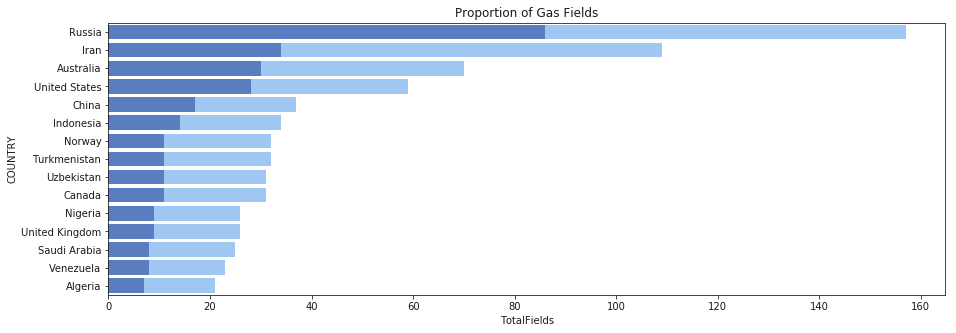

In [8]:
plt.figure(figsize = (15,5))
sns.set_color_codes("pastel")
data_c= pd.DataFrame(data_country.groupby('COUNTRY')['TotalFields'].sum().sort_values(ascending=False)).reset_index()
data_c
ax= sns.barplot('TotalFields','COUNTRY', data = data_c[:15], color ="b")
ax.set_title("Proportion of Gas Fields")
sns.set_color_codes("muted")
sns.barplot('TotalFields','COUNTRY', data = data_country[data_country['FIELD_TYPE']=='Gas'][:15], color ="b")


In [9]:
data_ct_fsz = pd.DataFrame(data.groupby(['COUNTRY', 'SIZE_CLASS'])['FLD_NAME'].count()).reset_index()
data_ct_fsz.columns = [['COUNTRY', 'SIZE_CLASS', 'COUNT']]
data_ct_fsz.sort_values('COUNT', ascending = False).head()

,COUNTRY,SIZE_CLASS,COUNT
73,Russia,Giant,138
93,United States,Giant,106
36,Iran,Giant,55
76,Saudi Arabia,Giant,48
16,China,Giant,35


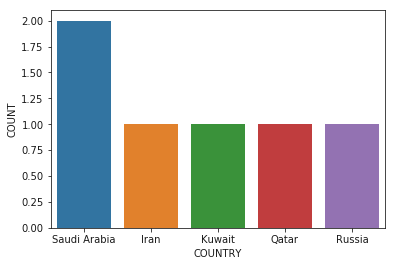

In [10]:
sns.barplot('COUNTRY', 'COUNT', data = data_ct_fsz[data_ct_fsz['SIZE_CLASS']== 'Megagiant'].sort_values('COUNT', ascending = False))

Alas! Saudi Arabai does have most of the biggest oil fields in the world.

Text(0.5,1,'Distribution of Supergiant Oil fields')

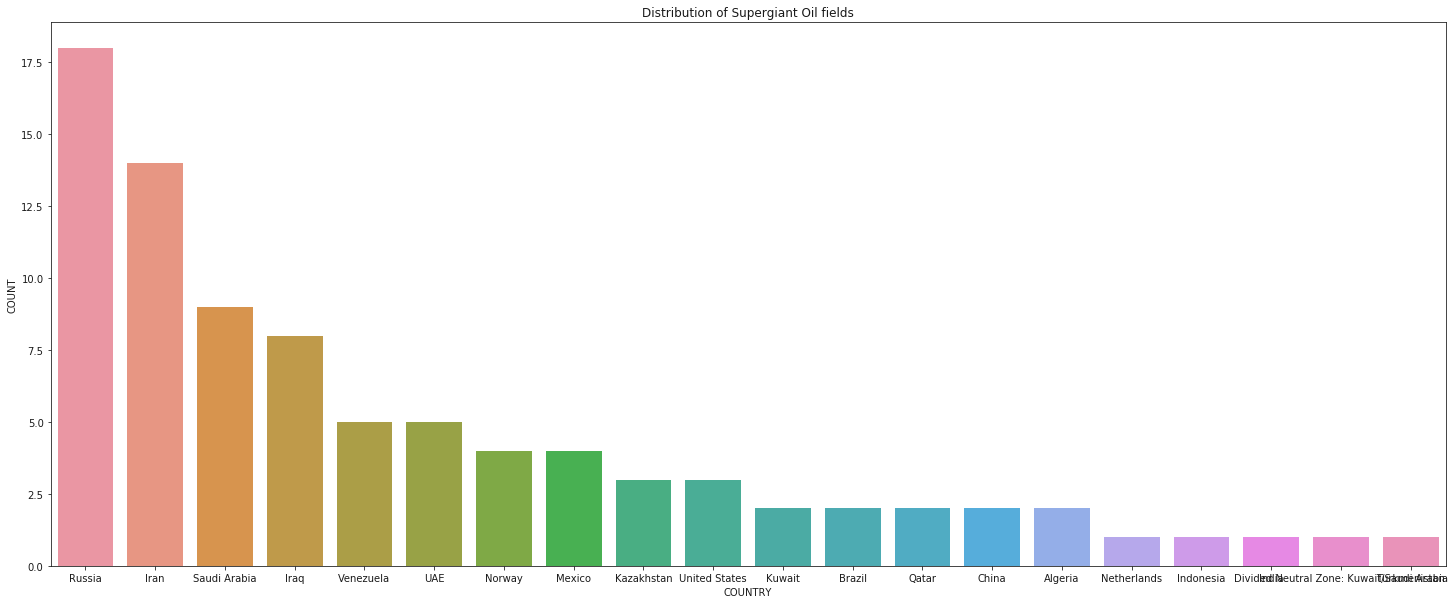

In [11]:
plt.figure(figsize = (25,10))
sns.barplot('COUNTRY', 'COUNT', data = data_ct_fsz[data_ct_fsz['SIZE_CLASS']== 'Supergiant'].sort_values('COUNT', ascending = False)[:20])
plt.title("Distribution of Supergiant Oil fields")

The highest number of supergiant fields are present in Russia followed by Iran and Saudi Arabia.

Text(0.5,1,'Distribution of Giant Oil fields')

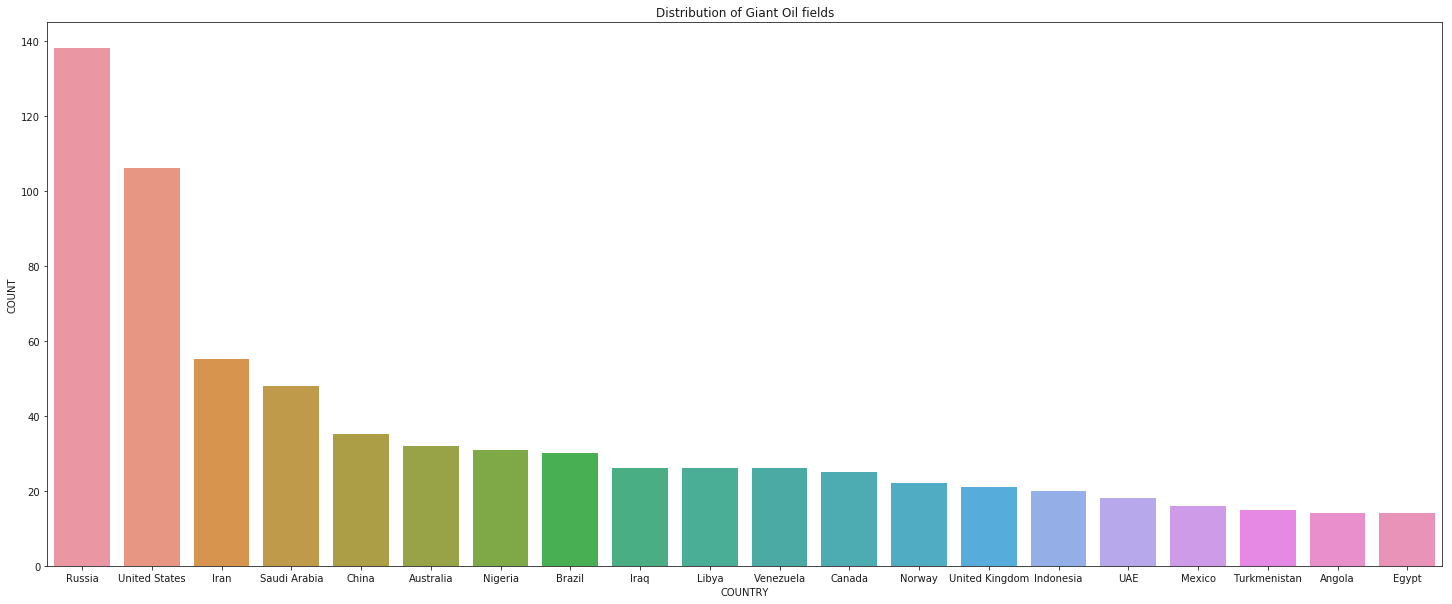

In [12]:
plt.figure(figsize = (25,10))
sns.barplot('COUNTRY', 'COUNT', data = data_ct_fsz[data_ct_fsz['SIZE_CLASS']== 'Giant'].sort_values('COUNT', ascending = False)[:20])
plt.title("Distribution of Giant Oil fields")

Most of the world's giant oil fields are present in Russia and the United States.

Let's look at the type of geological traps that the giant, supergiant and the megagiant fields primarily have.

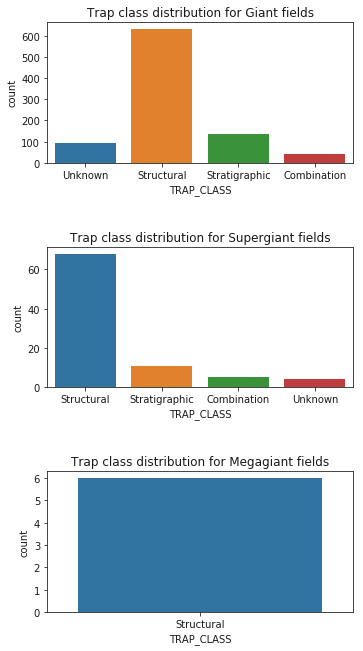

In [13]:
f, ax =plt.subplots(3,1, figsize = (5,9))
#sns.countplot('SIZE_CLASS', hue= 'TRAP_CLASS',data = data[data['SIZE']])
sns.countplot('TRAP_CLASS', data = data[data['SIZE_CLASS']=='Giant'], ax=ax[0])
ax[0].set_title("Trap class distribution for Giant fields")

sns.countplot('TRAP_CLASS', data = data[data['SIZE_CLASS']=='Supergiant'], ax=ax[1])
ax[1].set_title("Trap class distribution for Supergiant fields")

sns.countplot('TRAP_CLASS', data = data[data['SIZE_CLASS']=='Megagiant'], ax=ax[2])
ax[2].set_title("Trap class distribution for Megagiant fields")

plt.subplots_adjust(top=0.99, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)

Structural traps (Anticline, fault blocks or salts) definately dominate in having the highest hydrocarbon reserves as they are dominant in all the giant, supergiant and the megagiant fields. They are closely followed by stratigraphic traps. 

Let'sdelve deeper to know the type of traps for each group of fields.

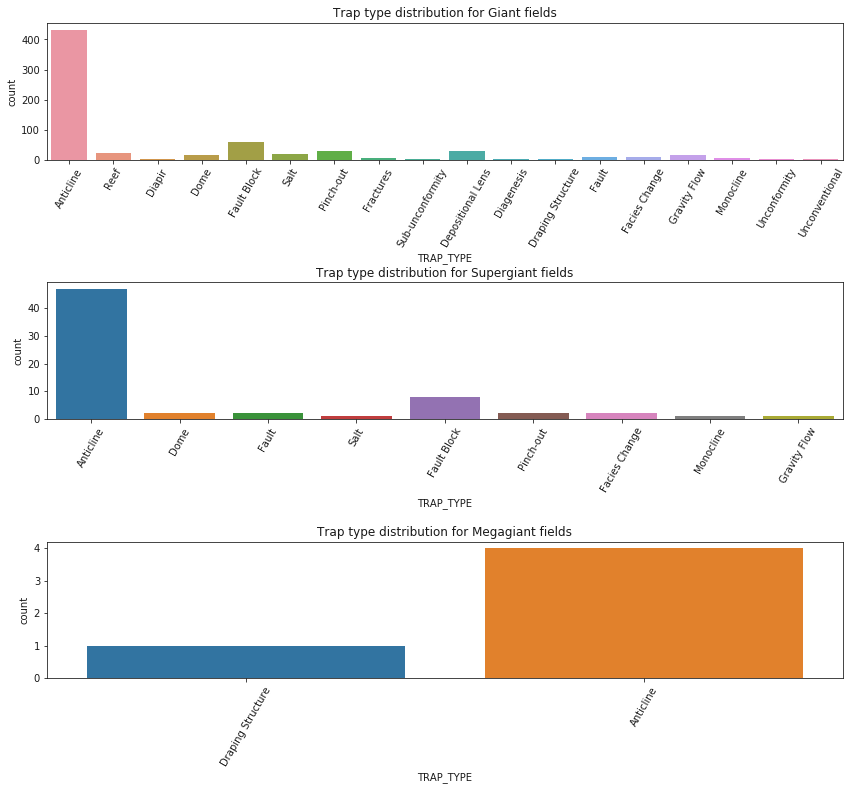

In [14]:
f,ax=plt.subplots(3,1,figsize=(13,10))
g = sns.countplot('TRAP_TYPE',data = data[data['SIZE_CLASS']== 'Giant'], ax= ax[0])
for item in g.get_xticklabels():
    item.set_rotation(60)
ax[0].set_title("Trap type distribution for Giant fields")
    
g = sns.countplot('TRAP_TYPE',data = data[data['SIZE_CLASS']== 'Supergiant'], ax= ax[1])
for item in g.get_xticklabels():
    item.set_rotation(60)
ax[1].set_title("Trap type distribution for Supergiant fields")
    
g = sns.countplot('TRAP_TYPE',data = data[data['SIZE_CLASS']== 'Megagiant'], ax= ax[2])
for item in g.get_xticklabels():
    item.set_rotation(60)
ax[2].set_title("Trap type distribution for Megagiant fields")
plt.subplots_adjust(top=0.99, bottom=0.08, left=0.10, right=0.95, hspace=0.9,
                    wspace=0.35)

Giant, Supergiant and Megagiant fields have their hydrocarbons trapped dominantly by anticlines, closely followed by faults. Other traps have lesser contribution.

Let's look at the reservoir lithology distribution for these fields.

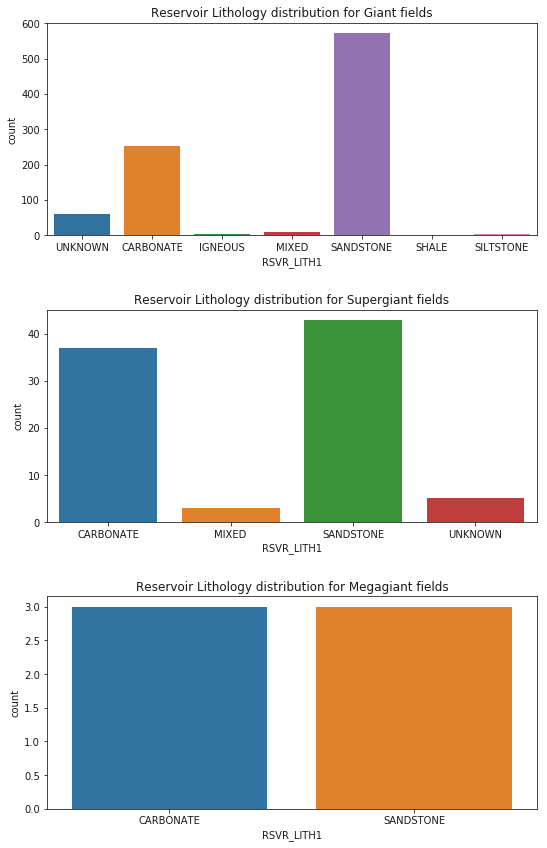

In [15]:
f,ax=plt.subplots(3,1,figsize=(8,12))

plt.subplot
g = sns.countplot('RSVR_LITH1',data = data[data['SIZE_CLASS']== 'Giant'], ax= ax[0])
for item in g.get_xticklabels():
    item.set_rotation(0)
ax[0].set_title("Reservoir Lithology distribution for Giant fields")
    
g = sns.countplot('RSVR_LITH1',data = data[data['SIZE_CLASS']== 'Supergiant'], ax= ax[1])
for item in g.get_xticklabels():
    item.set_rotation(0)
ax[1].set_title("Reservoir Lithology distribution for Supergiant fields")
    
g = sns.countplot('RSVR_LITH1',data = data[data['SIZE_CLASS']== 'Megagiant'], ax= ax[2])
for item in g.get_xticklabels():
    item.set_rotation(0)
ax[2].set_title("Reservoir Lithology distribution for Megagiant fields")
plt.subplots_adjust(top=0.99, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

The clastic brothers-Sandstone and Carbonate are the dominant reservoir lithologies as expected.

Type of Field

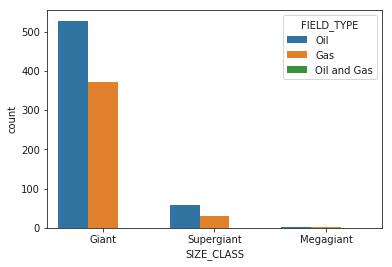

In [16]:
sns.countplot('SIZE_CLASS', hue= 'FIELD_TYPE',data = data)

The HISTORY of Discoveries:
    Let's loon at the times when mankind was at peaks and lows of discovering the black gold.

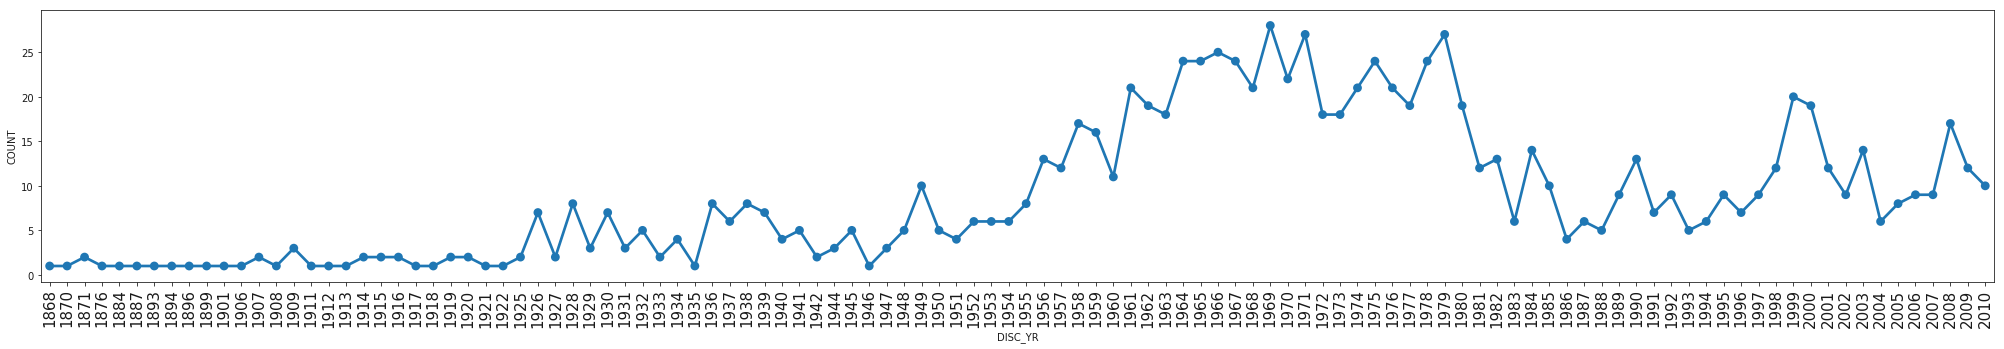

In [17]:
data_disc = pd.DataFrame(data.groupby('DISC_YR').size().sort_values()).reset_index()
data_disc.columns = ['DISC_YR', 'COUNT']
plt.figure(figsize = (35,5))
g = sns.pointplot('DISC_YR', 'COUNT', data = data_disc)
for item in g.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(15)

The hydrocarbon discoveries had been a consistent thing till 1950s, however peak of discoveries was reached through the 1960s, 1970s and 1980s probably due to the advent of high quality 3D seismic survey and other technologies.

Looking at the Oil prosperity of individual countries:

Text(0.5,1,"Countries' history of hydrocarbon discoveries")

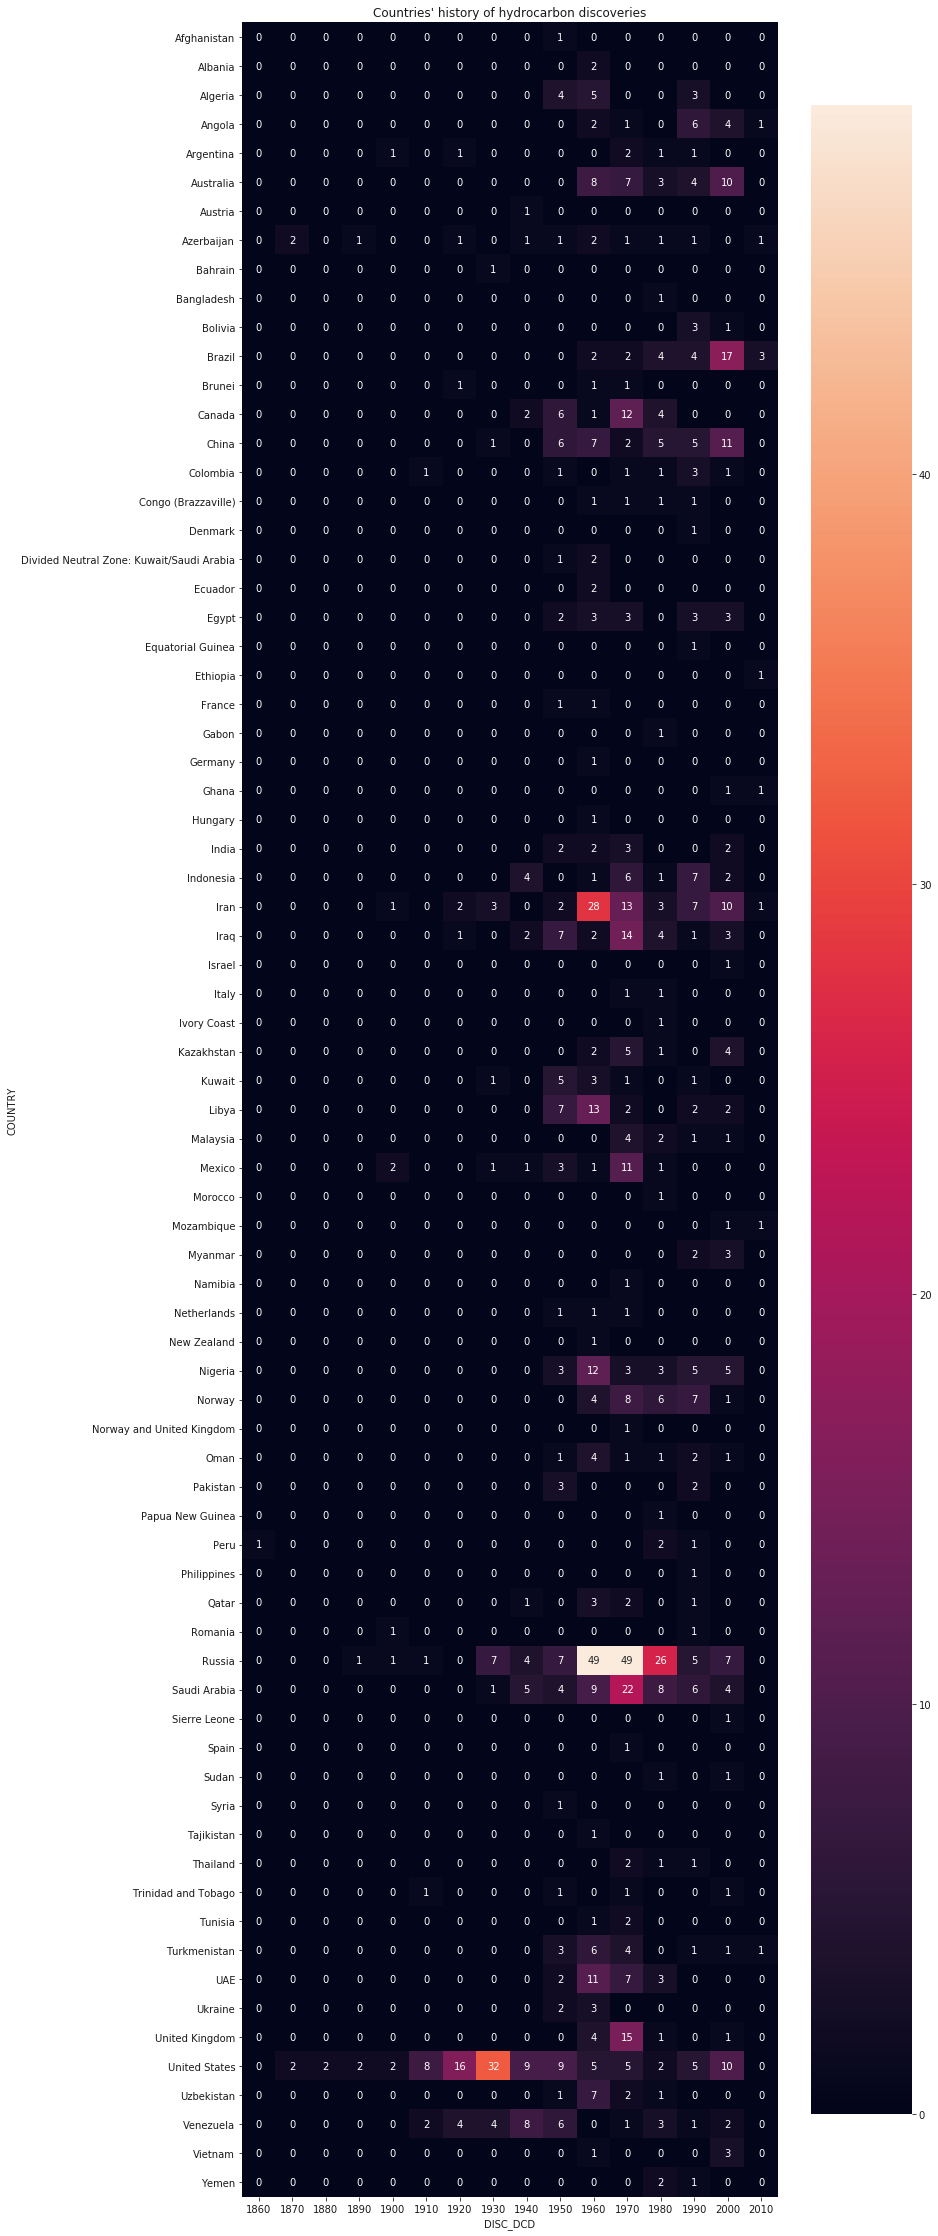

In [18]:
#Let's Check which countries had what period as biggest discoveries
#hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()

import math

data['DISC_DCD'] = data['DISC_YR'].apply(lambda x: (math.floor(x/10))*10)

data_dsc_dcd = pd.DataFrame(data.groupby(['COUNTRY', 'DISC_DCD'])['FIELD_ID'].count().sort_values(ascending =False)).reset_index()
data_dsc_dcd.columns = ['COUNTRY', 'DISC_DCD', 'COUNT']
data_dsc_dcd.head()
pvt_data = data_dsc_dcd.pivot('COUNTRY', 'DISC_DCD', 'COUNT')
pvt_data.fillna(0, inplace =True)
pvt_data.head()

f, ax = plt.subplots(figsize =(12,40))
sns.heatmap(pvt_data, annot = True)
ax.set_title("Countries' history of hydrocarbon discoveries")


Text(0.5,1,'Onshore Discoveries')

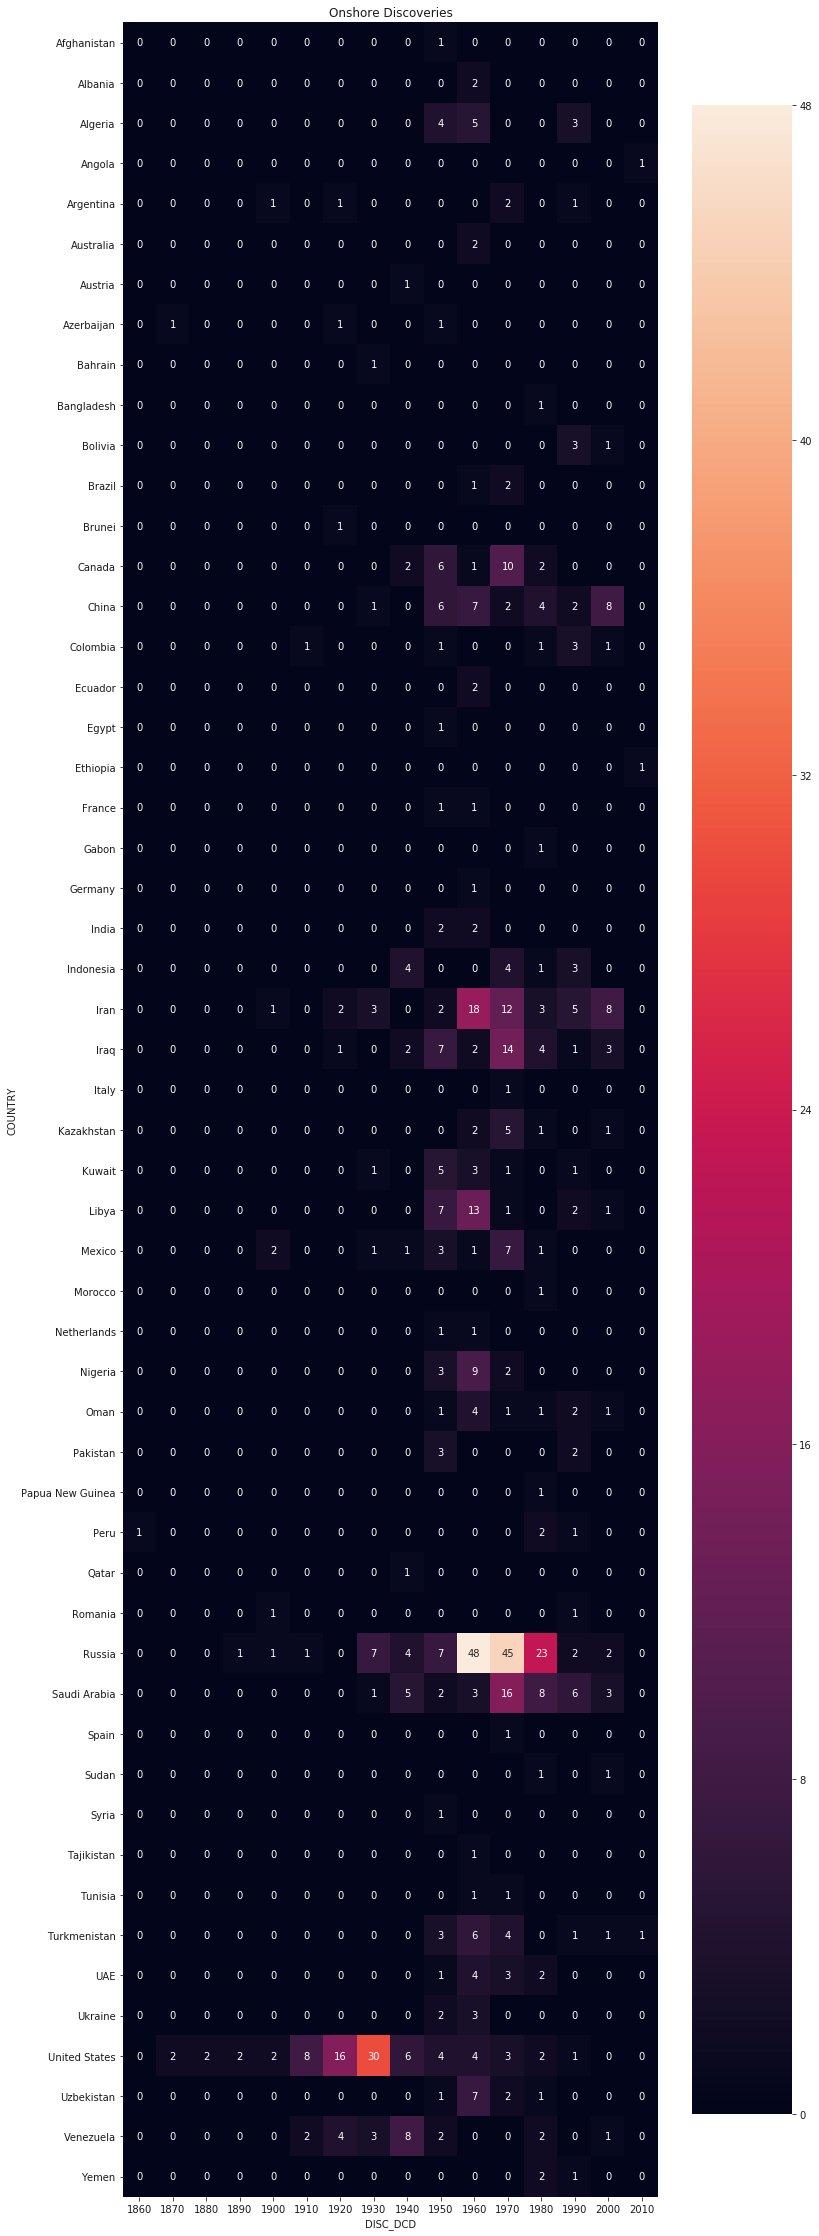

In [19]:

#Onshore Discoveries

data_dsc_dcd_on = pd.DataFrame(data[data['ON_OFF_LOC']=='Onshore'].groupby(['COUNTRY', 'DISC_DCD'])['FIELD_ID'].count().sort_values(ascending =False)).reset_index()
data_dsc_dcd_on.columns = ['COUNTRY', 'DISC_DCD', 'COUNT']
data_dsc_dcd_on.head()
pvt_data_on = data_dsc_dcd_on.pivot('COUNTRY', 'DISC_DCD', 'COUNT')
pvt_data_on.fillna(0, inplace =True)
pvt_data_on.head()

f, ax = plt.subplots(figsize =(12,40))
sns.heatmap(pvt_data_on, annot = True)
ax.set_title("Onshore Discoveries")

The onshore discoveries had peaked between 1930s through 1980s.

Text(0.5,1,'Offshore Discoveries')

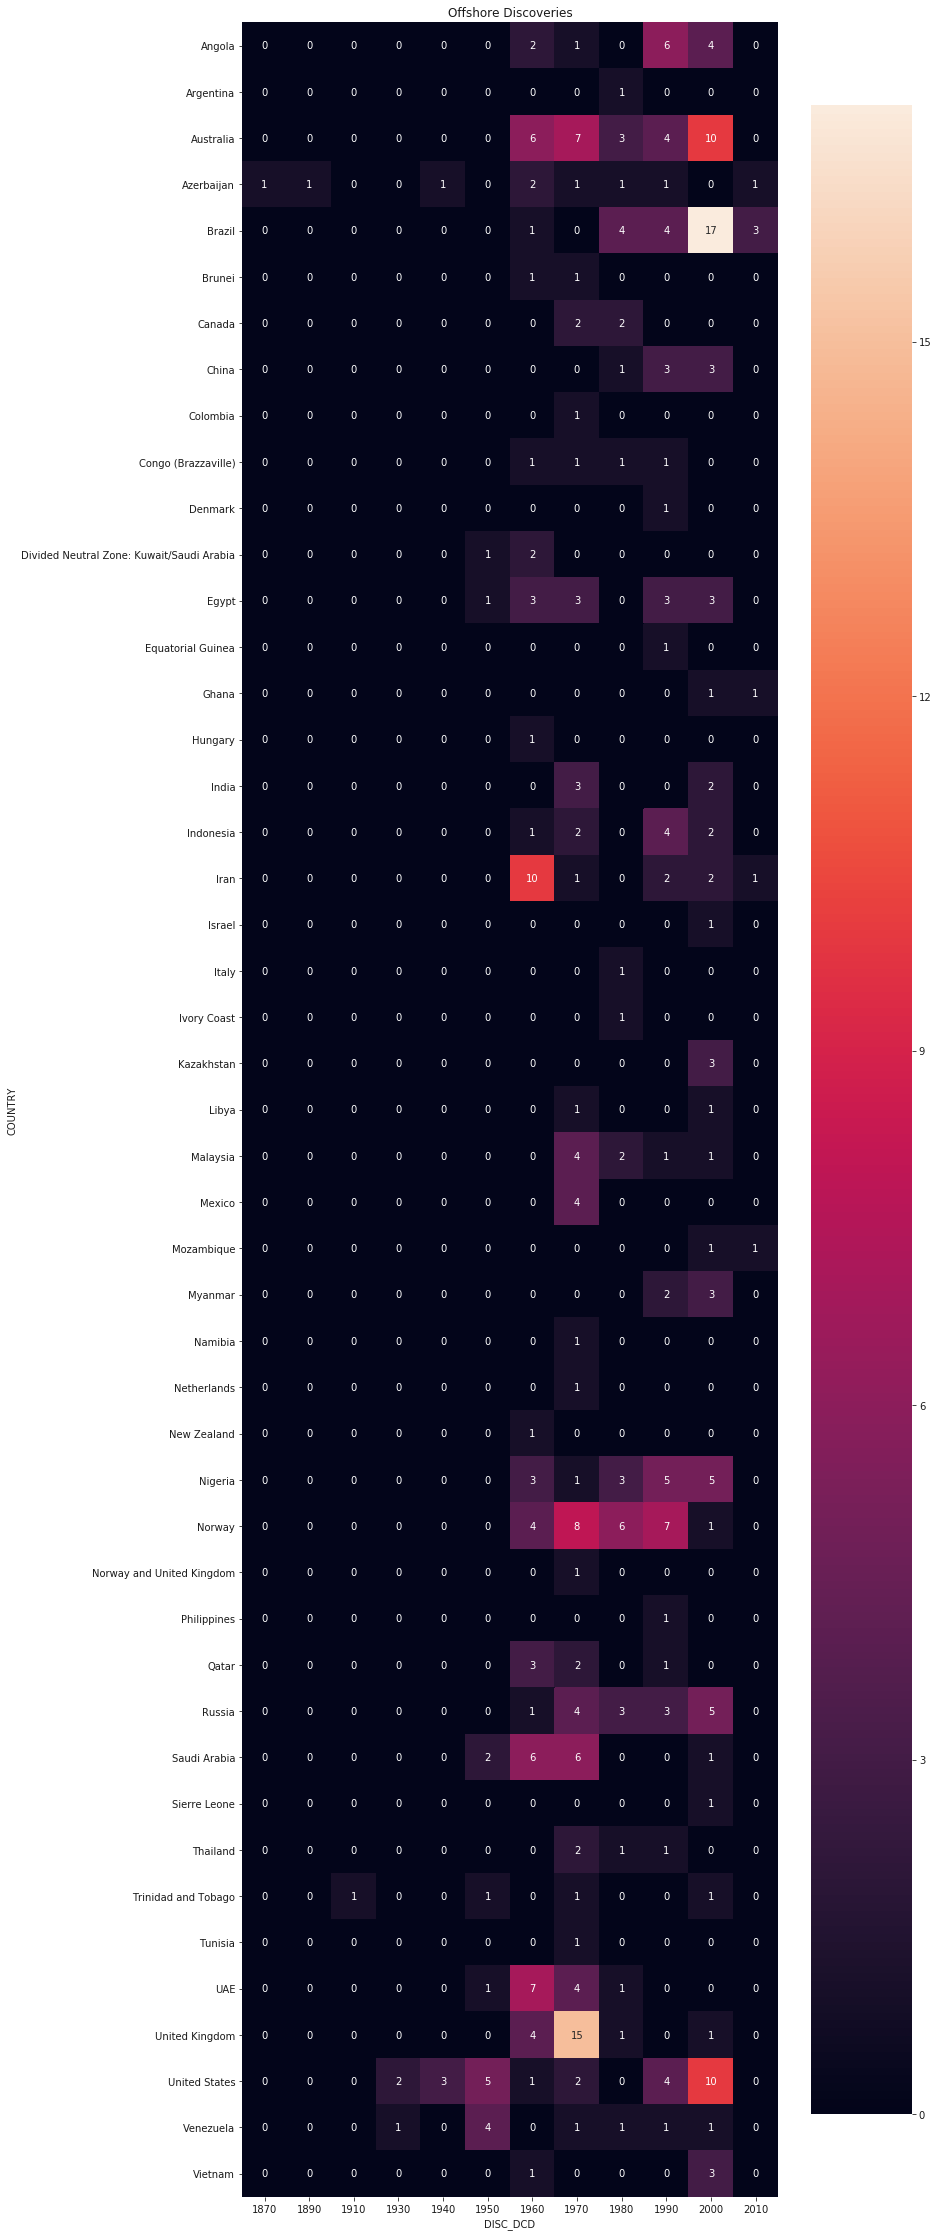

In [20]:

#Onshore Discoveries

data_dsc_dcd_off = pd.DataFrame(data[data['ON_OFF_LOC']=='Offshore'].groupby(['COUNTRY', 'DISC_DCD'])['FIELD_ID'].count().sort_values(ascending =False)).reset_index()
data_dsc_dcd_off.columns = ['COUNTRY', 'DISC_DCD', 'COUNT']
data_dsc_dcd_off.head()
pvt_data_off = data_dsc_dcd_off.pivot('COUNTRY', 'DISC_DCD', 'COUNT')
pvt_data_off.fillna(0, inplace =True)
pvt_data_off.head()

f, ax = plt.subplots(figsize =(12,40))
sns.heatmap(pvt_data_off, annot = True)
ax.set_title("Offshore Discoveries")

The offshore discoveries had peaked around the later part of the century (1970s through 2000s) due to the advancement of marine seismic acquisition technologies.

How much Oil? Let's look at the distribution of estimated ultimate recoveries of the oilfields according to their size.

Text(0.5,1,'Estimated Ultimate Recovery for Megagiant Fields (MMBOE)')

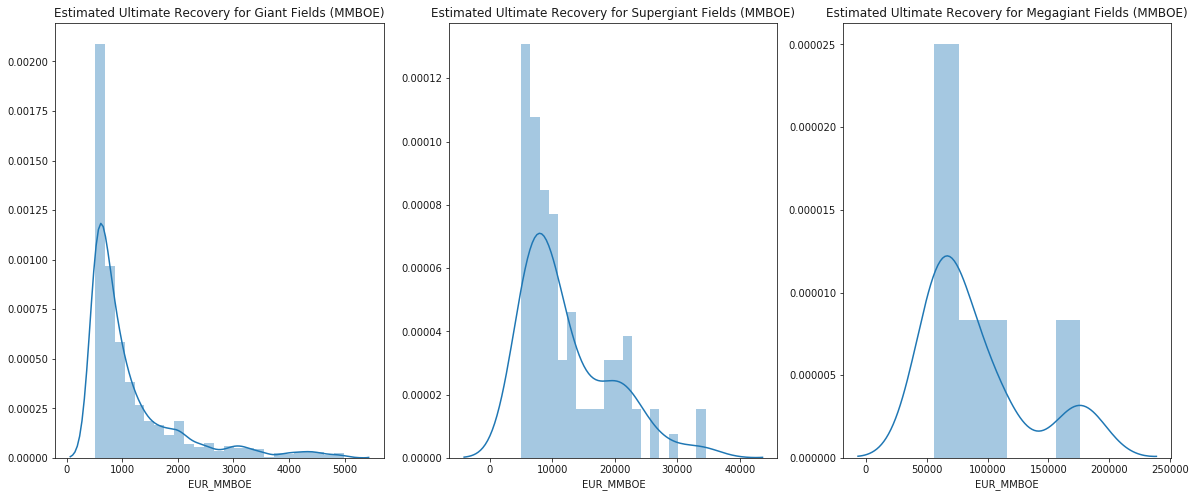

In [21]:
#MMBOE Distribution by SIZE CLASS
f, ax =plt.subplots(1,3, figsize=(20,8))
sns.distplot(data[data['SIZE_CLASS']=='Giant'].EUR_MMBOE, ax= ax[0], bins =25)
ax[0].set_title("Estimated Ultimate Recovery for Giant Fields (MMBOE)")
sns.distplot(data[data['SIZE_CLASS']=='Supergiant'].EUR_MMBOE, ax= ax[1], bins=20)
ax[1].set_title("Estimated Ultimate Recovery for Supergiant Fields (MMBOE)")
sns.distplot(data[data['SIZE_CLASS']=='Megagiant'].EUR_MMBOE, ax= ax[2], bins =6)
ax[2].set_title("Estimated Ultimate Recovery for Megagiant Fields (MMBOE)")

The numbers for Megagiant and Supergiant fields essentially dwarf the ones for Giant fields, on an average respectively being almost 10 & 100 folds to that of Giant fields.

How Deep? let's look the depth distributions of Oil and gas formations deposited during different geological times.

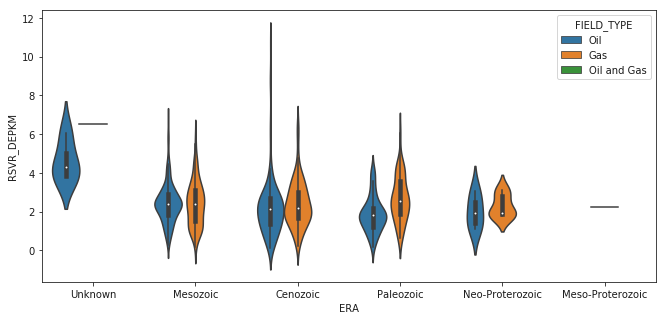

In [22]:
#Reservoir Depths according to ERAs
#f, ax = plt.subplots(1,)
plt.figure(figsize = (11,5))
sns.violinplot(x= 'ERA', y = 'RSVR_DEPKM', hue= 'FIELD_TYPE', data= data, split = False)

The deepest reservoirs go upto 12KMs!

The Maps! The Folium package gives us tools to generate interactive maps. Let's plot the location of the hydrocarbon fields found world wide.

In [23]:
field_loc = data[['LAT_DD', 'LON_DD']]
data['FLD_SIZE_ID']= data['SIZE_CLASS'].map({'Giant':1, 'Supergiant':2, 'Megagiant':3})
field_sz = data['FLD_SIZE_ID']
field_sz_str = data['SIZE_CLASS']

data['FLD_TYPE_OG']= data['FIELD_TYPE'].map({'Oil':1, 'Gas':2})
field_og = data['FLD_TYPE_OG']
field_name = data['FLD_NAME']
field_On_OFF = data['ON_OFF_LOC']
import folium
import folium.plugins

map = folium.Map(width = 1000, height = 500, location =[30,0], tiles = 'CartoDB dark_matter',zoom_start =1.5)

def color(og):
    
    if og == 2.0:
        col = 'red'
    else:
        col = 'green'
    return col


def size(sz):
    if sz ==1:
        size = 2
    if sz ==2:
        size = 5
    if sz ==3:
        size = 10
    return size

for fld in field_loc.index:
    folium.CircleMarker(list(field_loc.loc[fld].values),popup='<b>Location: </b>'+str(field_loc.loc[fld].values)+'<br><b>Field Size: </b>'+str(field_sz_str[fld])+'<br><b>Field ON/OFF: </b>'+str(field_On_OFF[fld]),color=color(field_og[fld]),radius=size(field_sz[fld])).add_to(map)
    
map
#field_og

The Circles represent the location of the hydrocarbon fields. Red=> Gas, Green=> Oil. The cicles' radii represent the size of the fields. 

Let's try to simulate the hydrocarbon discovery through the discussed history using an animation. The following code block depends on Basemap from matplotlib and may not run kernels without it. A gif created hence has been saved and displayed below.

In [26]:
from mpl_toolkits.basemap import Basemap
sorted_data = data.sort_values(['DISC_YR'], ascending = True)

fig = plt.figure(figsize =(15,10))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Oil & Gas Discoveries 1860-2010'+'\n'+'Year:' +str(Year))
    m2 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat=list(sorted_data[sorted_data['DISC_YR']==Year].LAT_DD)
    long=list(sorted_data[sorted_data['DISC_YR']==Year].LON_DD)
    x,y=m2(long,lat)
    m2.scatter(x, y,color = 'r', marker='o', zorder=2)
    m2.drawcoastlines()
    m2.drawcountries()
    m2.fillcontinents(zorder = 1,alpha=0.4)
    m2.drawmapboundary()
    

ani = animation.FuncAnimation(fig,animate,list(sorted_data.DISC_YR.unique()), interval = 10)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))



ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

![alt text](DiscoveryAnimation.gif "Discovery Animation")

Thank you for going through this work!